# CogSci 138 Lab 2: Muller-Lyer illusion and psychophysical measurement methods

In this lab we will look at the classic Muller-Lyer illusion, in which two line segments are presented and the observer is asked to indicate which is longer (the top line or the bottom line)? Because the lines have arrow heads at each side, sometimes the apparent length is illusory. You can learn more about this illusion here: https://www.illusionsindex.org/i/mueller-lyer 

In this lab you will learn:
1. What is the Muller Lyer illusion?
2. What parameters control the illusion's strength?
3. How to measure it using the Method of Adjustment
4. How to measure it using the Method of Constant Stimuli
5. How to estimate the Point of Subjective Equality (PSE) and Just Noticeable Difference (JND)
6. How PSE and JND vary as a function of illusion strength

## 0. Set up packages and global parameters
Like in Lab 1, we'll use Pyllusion, the lightweight and useful package for rendering classic optical illusions. Learn about the available illusions here: https://github.com/RealityBending/Pyllusion

In [1]:
!pip install pyllusion

  Using cached pyllusion-1.3-py2.py3-none-any.whl.metadata (19 kB)
Using cached pyllusion-1.3-py2.py3-none-any.whl (86 kB)


In [1]:
# imports & set up
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import pyllusion_lab

In [2]:
# global parameters
illusion_type = 'MullerLyer'
standard = 0.5
illusion_strengths = [-30, -15, 0, 15, 30]
differences = [-1, -0.66, -0.33, 0, 0.33, 0.66, 1]
lab = "lab2"
output_data_path = '../expt_results/' + lab + '/'
prerendered_stimuli_dir = output_data_path + "pre_rendered_stimuli/"
if os.path.exists(output_data_path) == False:
    os.makedirs(output_data_path)

## 1. Pyllusion and the Muller-Lyer illusion
In Pyllusion's implementation of the Muller-Lyer illusion there are two main parameters that will affect if you perceive it:
1. difference (the actual difference in length)
2. illusion_strength (the arrow angle)

In the next example you will see what it means to vary the illusion strength, while keeping the difference between the upper and bottom lines at zero. Even though the red lines are always the same length, do you see that sometimes the top and bottom lines appear to be different lengths, especially when the illusion strength (arrow angles) is high?

In [3]:
# pre-render a bunch of illusions -- it takes a few minutes but will result in faster experiments
stimuli_df = pyllusion_lab.pre_render_stimuli(illusion_type, illusion_strengths=illusion_strengths, standard=standard, differences=differences, prerendered_stimuli_dir=prerendered_stimuli_dir);

35 of the right stimuli already exist, not rendering more


MullerLyer illusion with 5 different arrow angles (illusion strengths)


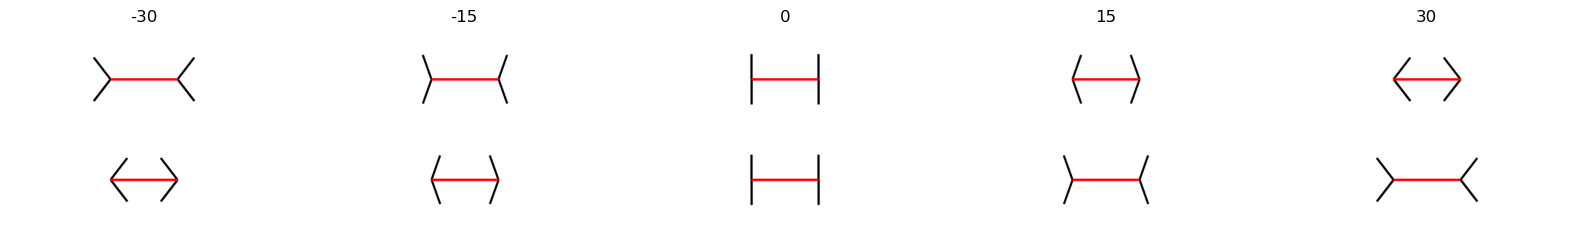

In [4]:
difference = 0
plt.figure(figsize=(20,5))
for i,illusion_strength in enumerate(illusion_strengths, start=1): 
    plt.subplot(1,len(illusion_strengths),i)
    stimulus_img, stimulus_params = pyllusion_lab.load_prerendered_stimulus(stimuli_df, illusion_type, illusion_strength=illusion_strength, difference=difference, standard=standard)
    plt.imshow(stimulus_img)
    plt.axis('off')
    plt.title(illusion_strength)
print(f"{illusion_type} illusion with {len(illusion_strengths)} different arrow angles (illusion strengths)") 

In the next example you will see what it means to vary the difference between the line segments, while keeping the arrow angles fixed at 0. When the arrow angle is zero, the illusion doesn't usually occur: You should be able to accurately tell which line is longer.

MullerLyer illusion with illusion strength = 0 and 7 different relative lengths


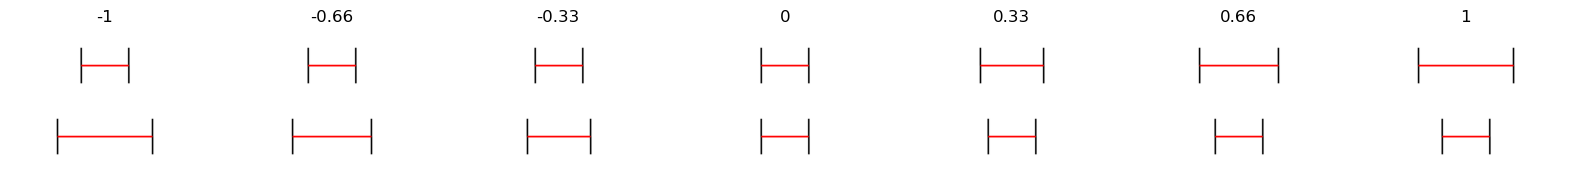

In [5]:
illusion_strength = 0
plt.figure(figsize=(20,5))
for i,delta in enumerate(differences, start=1): 
    plt.subplot(1,len(differences),i)
    stimulus_img, stimulus_params = pyllusion_lab.load_prerendered_stimulus(stimuli_df, illusion_type, illusion_strength=illusion_strength, difference=delta, standard=standard) 
    plt.imshow(stimulus_img)
    plt.axis('off')
    plt.title(delta)
print(f"{illusion_type} illusion with illusion strength = 0 and {len(differences)} different relative lengths")

Putting it all together, now we can make a nifty table of changing the arrow angle and the relative length:

MullerLyer illusion with various arrow angles and and relative lengths.
When Δ is 0 (middle column), any apparent length difference is illusory
When Δ is not zero (all the other columns), seeing the two lines as the same length is illusory


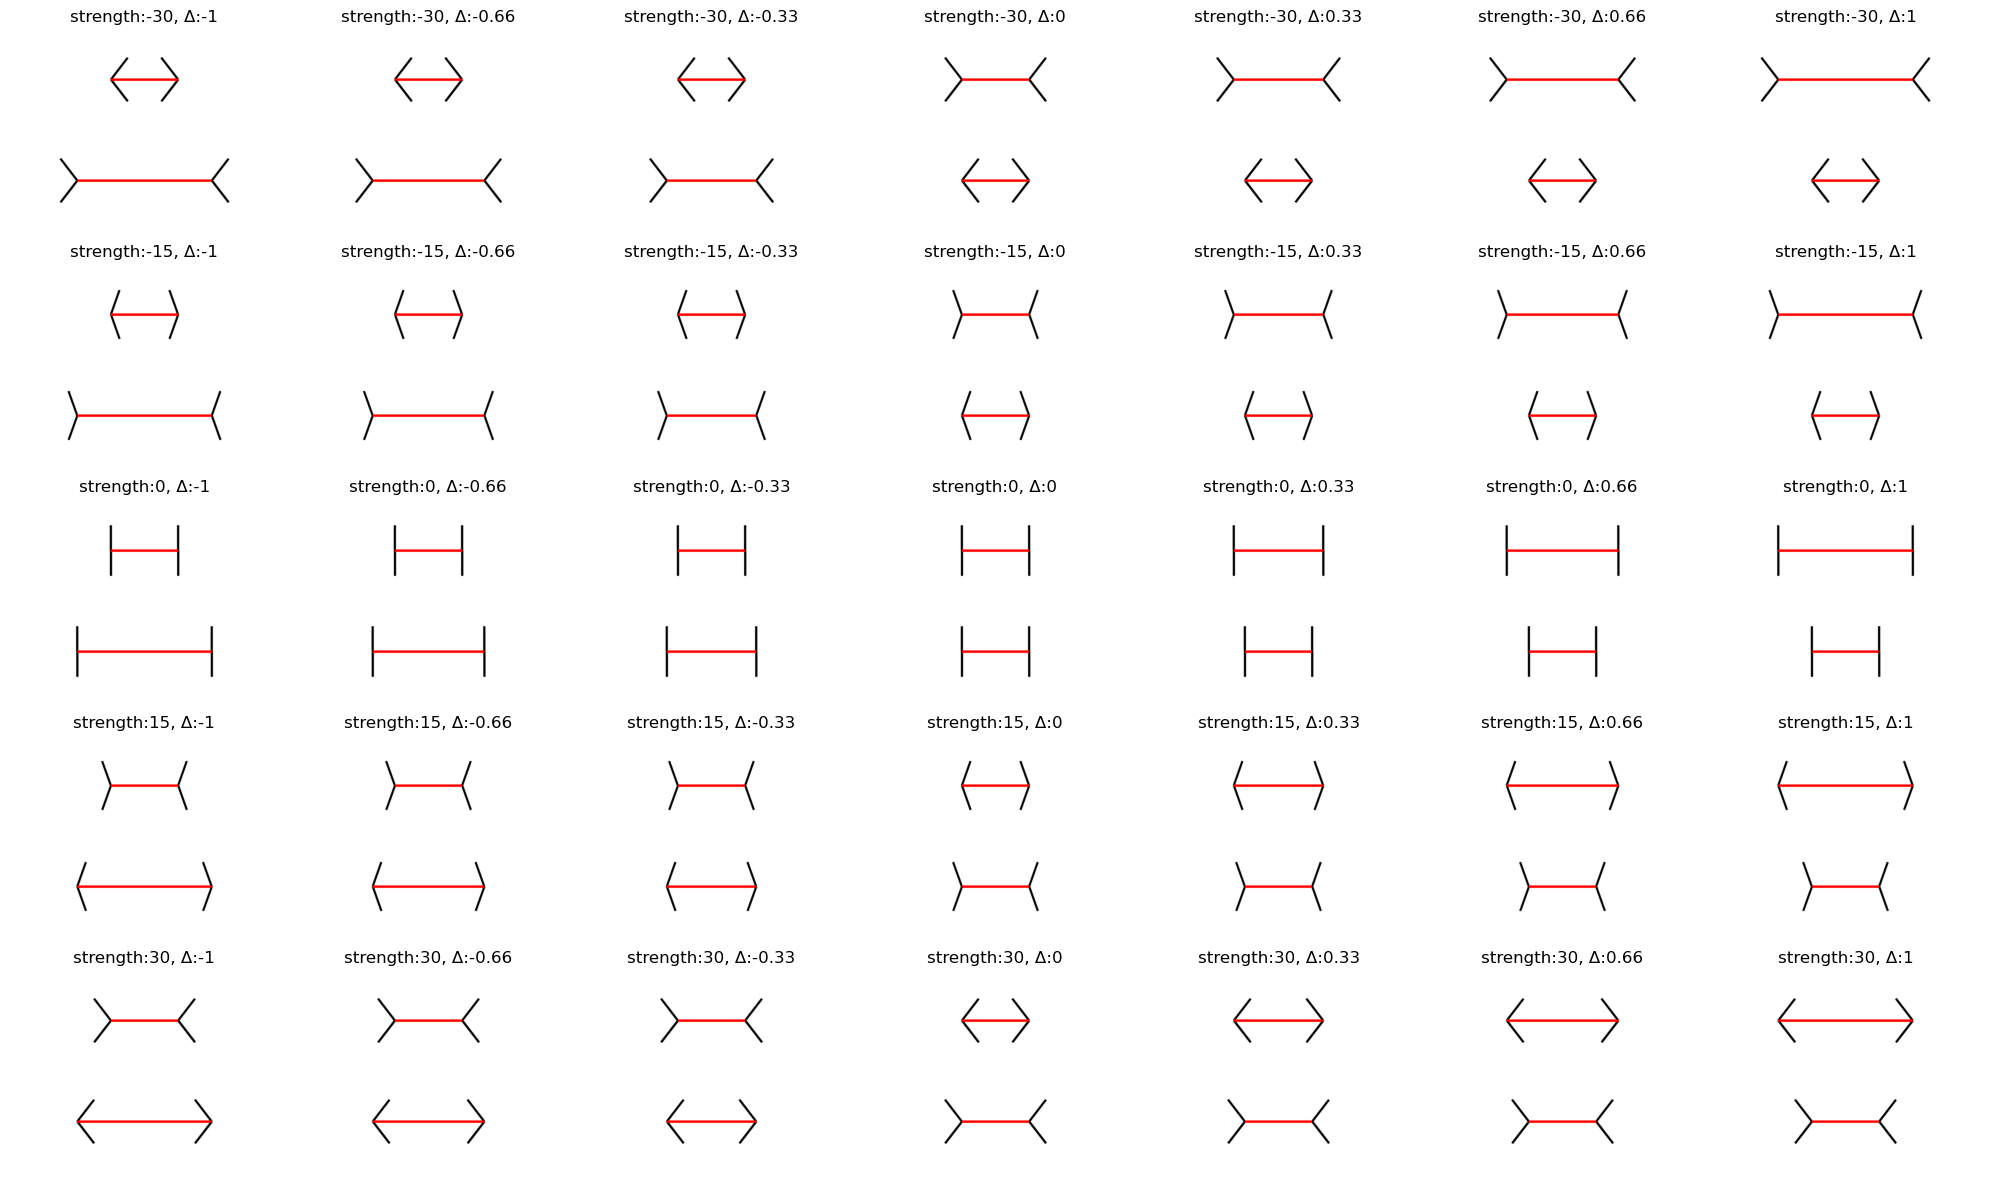

In [6]:
plt.figure(figsize=(20,12))
for i,illusion_strength in enumerate(illusion_strengths, start=0): 
    for j,delta in enumerate(differences, start=1): 
        plt.subplot(len(illusion_strengths),len(differences),i*len(differences)+j)
        stimulus_img, stimulus_params = pyllusion_lab.load_prerendered_stimulus(stimuli_df, illusion_type, illusion_strength=illusion_strength, difference=delta, standard=standard)     
        plt.imshow(stimulus_img)
        plt.axis('off')
        plt.title(f"strength:{illusion_strength}, Δ:{delta}")
plt.tight_layout()
print(f"{illusion_type} illusion with various arrow angles and and relative lengths.")
print("When difference (Δ) is 0 (middle column), any apparent length difference is illusory")
print("When difference (Δ) is not zero (all the other columns), seeing the two lines as the same length is illusory")

## 2. Method of Adjustment
Now that you know the scope of this stimulus, let's quantify your perception of this illusion using the simplest of quantitative measurement techniques: the method of adjustment. The slider will adjust the relative line length. It may react a bit slowly so be patient. We will measure the Point of Subjective Equality (PSE) which in this case is line difference when you perceive the upper and lower lines to be the same. We will measure the PSE for three different arrow angles and then see if the arrow angle really does affect how strongly you perceive the illusion.

In [7]:
# Run the experiment with three different illusion strengths (arrow angles)

# set up place for results
observer_ID = input("Enter observer ID as a three digit number: ")
datetime_string = datetime.now().strftime("%Y-%m-%d-%H-%M")
results_adjustment_fname = f"{output_data_path}{lab}_{illusion_type}_adjustment_{observer_ID}_{datetime_string}.csv"
results_adjustment_fig_fname = f"{output_data_path}{lab}_{illusion_type}_adjustment_{observer_ID}_{datetime_string}.jpg"
adjustment_results_df = pd.DataFrame(columns=['illusion_strength','difference', 'standard', 'comparison', 'PSE']) # set up a dataframe for the adjustment results

# set up expt parameters
illusion_strengths = [30,15,0]
instructions = "\n\nAdjust the slider until the top and bottom lines are perceived to be equal (be patient, it may be slow to respond)."

Enter observer ID as a three digit number:  1


In [8]:
# measure first illusion strength
i = 0 # the experiment number
adjustment_results = pyllusion_lab.pyllusion_adjustment_expt(illusion_type, illusion_strength=illusion_strengths[i], standard=standard, instructions=instructions);



Adjust the slider until the top and bottom lines are perceived to be equal (be patient, it may be slow to respond).
When you are done, hit Submit to see you results.


In [9]:
# record Point of Subjective Equality (PSE) for first illusion strength (this is a new cell because it doesn't work well when in the same cell as the experiment!)
adjustment_results_df.loc[len(adjustment_results_df)] = adjustment_results 

# measure second illusion strength
i += 1
adjustment_results = pyllusion_lab.pyllusion_adjustment_expt(illusion_type, illusion_strength=illusion_strengths[i], standard=standard, instructions=instructions);



Adjust the slider until the top and bottom lines are perceived to be equal (be patient, it may be slow to respond).
When you are done, hit Submit to see you results.


In [10]:
# record PSE for second illusion strength (this is a new cell because it doesn't work well when in the same cell as the experiment!)
adjustment_results_df.loc[len(adjustment_results_df)] = adjustment_results 

# measure third illusion strength
i += 1
adjustment_results = pyllusion_lab.pyllusion_adjustment_expt(illusion_type, illusion_strength=illusion_strengths[i], standard=standard, instructions=instructions);



Adjust the slider until the top and bottom lines are perceived to be equal (be patient, it may be slow to respond).
When you are done, hit Submit to see you results.


In [11]:
# record PSE for third illusion strength & see table of results
adjustment_results_df.loc[len(adjustment_results_df)] = adjustment_results 
adjustment_results_df

,illusion_strength,difference,standard,comparison,PSE
0,30,0.45,0.5,0.725,0.225
1,15,0.20,0.5,0.600,0.100
2,0,0.05,0.5,0.525,0.025


Results saved to ../expt_results/lab2/lab2_MullerLyer_adjustment_1_2025-06-02-14-51.csv
Saved figure to ../expt_results/lab2/lab2_MullerLyer_adjustment_1_2025-06-02-14-51.jpg


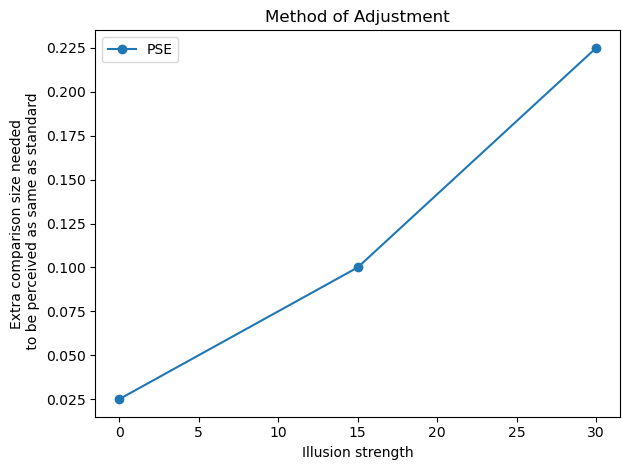

In [12]:
# plot, and save results and plot to files
pyllusion_lab.save_results_to_csv(adjustment_results_df, results_fname=results_adjustment_fname);
pyllusion_lab.plot_adjustment_results(adjustment_results_df, results_adjustment_fig_fname);

The Method of Adjustment is fast, easy and intuitive. We were able to quickly estimate the Point of Subjective (PSE) equality, so quickly that we redid it three times. A non-zero PSE basically means there is an illusion. The higher the PSE, the stronger the illusion. 

Some issues with Method of Adjustment:

1. The slider start position was randomized in the above experiment. How do you think the slider start position may bias the observer?
1. It is challenging to estimate the Just Noticeable Difference (JND) with this method. 
1. What else did you notice?

## 3. Method of Constant Stimuli

Next we will try to quantify your perception of the Muller-Lyer illusion using a more robust and controlled quantitative measurement technique: The Method of Constant Stimuli. Instead of a slider, you will simply see the illusion and hit the up or down arrow. You will repeat this many times in many conditions to get enough measurements to estimate PSE and JND. Since this takes a little longer, we'll just run it at one illusion strength.

In [13]:
welcome_instructions = "In this experiment, you will see two lines with arrows, and be asked to judge whether the top or bottom line is longer."
trial_instructions="Which looked longer?"
illusion_strength_test = 30 # for here, we'll just test at one illusion strength
constantstimuli_results_df, get_results_fname = pyllusion_lab.pyllusion_constantstim_expt(
    illusion_type, illusion_strength=illusion_strength_test, differences=differences, num_trials_per_level=3, 
    standard=standard, duration=0.8, output_data_path=output_data_path + lab + "_", welcome_instructions=welcome_instructions, 
    trial_instructions=trial_instructions, stimuli_df=stimuli_df);

### Analyze Method of Constant Stimuli experiment results to estimate the PSE and JND

In [14]:
# let's just peak at the data to see its format
results_constantstim_fname = get_results_fname()
constantstimuli_results_df = pd.read_csv(results_constantstim_fname)
constantstimuli_results_df.head()

,trial,illusion_strength,standard,difference,response,RT,size1,size2,standard1,chooseComparison
0,1,30,0.5,-0.33,2,2.676132,0.50,0.665,True,True
1,2,30,0.5,1.00,1,1.410733,1.00,0.500,False,False
2,3,30,0.5,0.66,1,1.313591,0.83,0.500,False,False
3,4,30,0.5,-1.00,2,1.483298,0.50,1.000,True,True
4,5,30,0.5,0.00,2,1.356350,0.50,0.500,False,False


PSE (50% point): -0.17
JND (half 25–75 spread): 0.08
Saved figure to ../expt_results/lab2/MullerLyer_30_constant_stimuli_1_2025-06-02-14-52.jpg


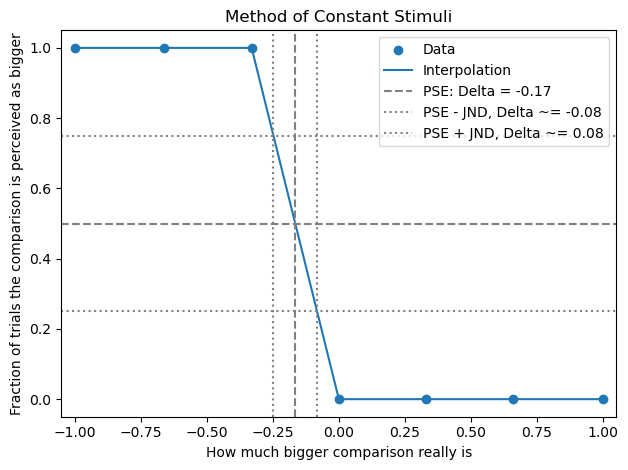

In [15]:
# plot the psychometric function, get PSE and JND
PSE, JND = pyllusion_lab.get_PSE_JND_constantstim_plot(results_constantstim_fname);

The vertical dashed line on the plot above indicates the Point of Subjective Equality (PSE). This is the size for the comparsion (arrows pointed out) which is, on average, perceived to be the same as the standard line (arrows pointed in). Because we used a non-zero illusion strength, the PSE is probably non-zero too. As before, a non-zero PSE basically means there is an illusion. The higher the abs(PSE), the stronger the illusion. 

The Just Noticeable Difference (JND) represents is the amount the length of the comparison must be changed in order it to be noticed about half the time. In the Goldstein et al (2008) reading, they call that the difference threshold. If the JND is very small, the observer is very senstive to small changes. If it is very large, then the observer won't notice substantial differences in the stimulus. A small JND implies that the illusion could break quite easily, whereas a large JND could imply that it is harder to break.

The next image will show the illusion at the PSE as well as one JND above and below. If the analysis is correct, you should perceive the top and bottom lines to be perceived the same at the PSE. And it should be hard to notice the difference between the PSE and one JND above or below.

MullerLyer illusion with strength 30 at the PSE and one JND below and above. Can you perceive the difference? Probably not easily.


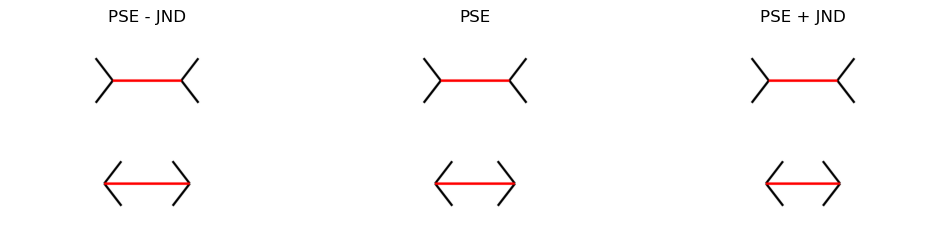

In [16]:
pyllusion_lab.plot_illusion_at_PSE_JND(illusion_type, PSE, JND, illusion_strength=illusion_strength_test, standard=standard)

## 4. Lab 2 Deliverables

If you've made it this far, you should now have an understanding of the factors that affect the Muller-Lyer illusion, and how to measure it using two methods: method of adjustment and method of constant stimuli. To complete lab 2: 

Click on the folder icon in the upper left, and navigate to /expt_results/lab2/. 

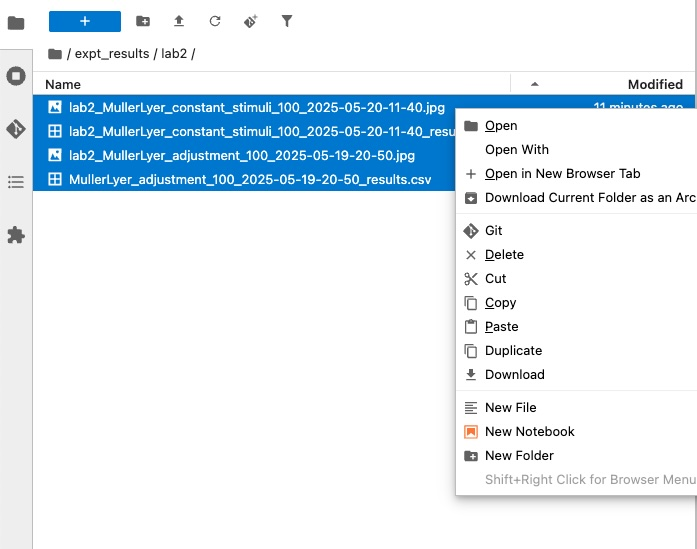

Select all four files, and then right click to download them. 

1. lab2_MullerLyer_adjustment....results.csv
1. lab2_MullerLyer_adjustment....jpg
1. lab2_MullerLyer_constant_stimuli....results.csv
1. lab2_MullerLyer_constant_stimuli....jpg

Now upload all four files to bCourses and answer the questions in the [Lab 2 quiz](https://bcourses.berkeley.edu/courses/1544768/quizzes/2501025). Congrats on finishing lab 2!